# ランドマークをもとに指定する場合

In [2]:
from align import *

### ランドマークの取得

In [4]:
landmarks_model_path = unpack_bz2(
        get_file(
            'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2',
            'temp/shape_predictor_68_face_landmarks.dat.bz2'))

ALIGNED_IMAGES_DIR = 'imgs_test_align'
PROCESSED_IMAGES_DIR = 'imgs_test_processing'
if not osp.exists(PROCESSED_IMAGES_DIR): os.makedirs(PROCESSED_IMAGES_DIR)

files = os.listdir(ALIGNED_IMAGES_DIR)
print(f'total img files {len(files)}')

lms = {}
landmarks_detector = LandmarksDetector(landmarks_model_path)
for img_name in files:
    raw_img_path = os.path.join(ALIGNED_IMAGES_DIR, img_name)
    print('img_name:', img_name)
    for i, face_landmarks in enumerate(
            landmarks_detector.get_landmarks(raw_img_path),
            start=1):
        
        lms[img_name] = np.array(face_landmarks)

cached
cached
total img files 10
img_name: test01.png
img_name: test02.png
img_name: test03.png
img_name: test04.png
img_name: test05.png
img_name: test06.png
img_name: test07.png
img_name: test08.png
img_name: test09.png
img_name: test10.png


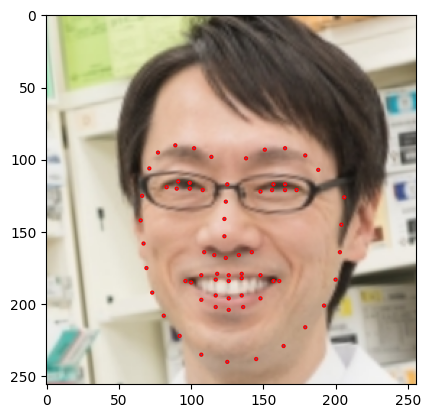

In [103]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img = PIL.Image.open(img_path)
# img2 = PIL.Image.open('imgs_test_align/yotaka_smile.png')

fig,ax = plt.subplots()
for lm in lms[img_name]:
    r = patches.Circle(xy=lm, radius=1, ec='r')
    ax.add_patch(r)

ax.imshow(img)

### 切り取り矩形の作成

In [10]:
lms.keys()

dict_keys(['test01.png', 'test02.png', 'test03.png', 'test04.png', 'test05.png', 'test06.png', 'test07.png', 'test08.png', 'test09.png', 'test10.png'])

In [134]:
# lmsにある画像から選択
img_name = 'test01.png'
img_path = ALIGNED_IMAGES_DIR + '/' + img_name

lm_chin = np.array(lms[img_name][0:17])  # left-right
lm_eyebrow_left = np.array(lms[img_name][17:22])  # left-right
lm_eyebrow_right = np.array(lms[img_name][22:27])  # left-right
lm_nose = np.array(lms[img_name][27:31])  # top-down
lm_nostrils = np.array(lms[img_name][31:36])  # top-down
lm_eye_left = np.array(lms[img_name][36:42])  # left-clockwise
lm_eye_right = np.array(lms[img_name][42:48])  # left-clockwise
lm_mouth_outer = np.array(lms[img_name][48:60])  # left-clockwise
lm_mouth_inner = np.array(lms[img_name][60:68])  # left-clockwise

# Calculate auxiliary vectors.
eye_left = np.mean(lm_eye_left, axis=0)
eye_right = np.mean(lm_eye_right, axis=0)
eye_avg = (eye_left + eye_right) * 0.5
eye_to_eye = eye_right - eye_left
mouth_left = lm_mouth_outer[0]
mouth_right = lm_mouth_outer[6]
mouth_avg = (mouth_left + mouth_right) * 0.5
eye_to_mouth = mouth_avg - eye_avg

In [98]:
# 切り取り矩形の可視化用のdict
# rect: left-top(x,y), size(w,h)
rects_dict = {}

In [99]:
eye_left_max = np.max(lm_eye_left, axis=0)+np.array([8,10])  # [x,y]手動で調整
eye_left_min = np.min(lm_eye_left, axis=0)-np.array([13,8])
eye_left_size = eye_left_max - eye_left_min 
eye_left_rect = np.concatenate([eye_left_min, eye_left_size])
rects_dict['eye_left'] = eye_left_rect

eye_right_max = np.max(lm_eye_right, axis=0)+np.array([13,8])
eye_right_min = np.min(lm_eye_right, axis=0)-np.array([8,10])
eye_right_size = eye_right_max - eye_right_min 
eye_right_rect = np.concatenate([eye_right_min, eye_right_size])
rects_dict['eye_right'] = eye_right_rect

eye_max = np.max((eye_left_max, eye_right_max), axis=0)
eye_min = np.min((eye_left_min, eye_right_min), axis=0)
eye_size = eye_max - eye_min
eye_rect = np.concatenate([eye_min, eye_size])
rects_dict['eye'] = eye_rect

In [100]:
lm_eye2eyebrow_left = np.concatenate([lm_eye_left, lm_eyebrow_left])
eye2eyebrow_left_max = np.max(lm_eye2eyebrow_left, axis=0)+np.array([5,10])
eye2eyebrow_left_min = np.min(lm_eye2eyebrow_left, axis=0)-np.array([5,5])
eye2eyebrow_left_size = eye2eyebrow_left_max - eye2eyebrow_left_min
eye2eyebrow_left_rect = np.concatenate([eye2eyebrow_left_min, eye2eyebrow_left_size])
rects_dict['eye2eyebrow_left'] = eye2eyebrow_left_rect

lm_eye2eyebrow_right = np.concatenate([lm_eye_right, lm_eyebrow_right])
eye2eyebrow_right_max = np.max(lm_eye2eyebrow_right, axis=0)+np.array([5,10])
eye2eyebrow_right_min = np.min(lm_eye2eyebrow_right, axis=0)-np.array([5,5])
eye2eyebrow_right_size = eye2eyebrow_right_max - eye2eyebrow_right_min
eye2eyebrow_right_rect = np.concatenate([eye2eyebrow_right_min, eye2eyebrow_right_size])
rects_dict['eye2eyebrow_right'] = eye2eyebrow_right_rect

eye2eyebrow_max = np.max((eye2eyebrow_left_max, eye2eyebrow_right_max), axis=0)
eye2eyebrow_min = np.min((eye2eyebrow_left_min, eye2eyebrow_right_min), axis=0)
eye2eyebrow_size = eye2eyebrow_max - eye2eyebrow_min
eye2eyebrow_rect = np.concatenate([eye2eyebrow_min, eye2eyebrow_size])
rects_dict['eye2eyebrow'] = eye2eyebrow_rect
eye2eyebrow_rect_center = eye2eyebrow_min + eye2eyebrow_size/2

In [101]:
mouth_max = np.max(lm_mouth_outer, axis=0)+np.array([8,10])
mouth_min = np.min(lm_mouth_outer, axis=0)-np.array([13,8])
mouth_size = mouth_max - mouth_min 
mouth_rect = np.concatenate([mouth_min, mouth_size])
rects_dict['mouth'] = mouth_rect

In [126]:
lm_nose2mouth = np.concatenate([np.array(lms[img_name][30:36]), lm_mouth_outer])
nose2mouth_max = np.max(lm_nose2mouth, axis=0)+np.array([15,10])
nose2mouth_min = np.min(lm_nose2mouth, axis=0)-np.array([15,5])
nose2mouth_size = nose2mouth_max - nose2mouth_min
nose2mouth_rect = np.concatenate([nose2mouth_min, nose2mouth_size])
rects_dict['nose2mouth'] = nose2mouth_rect
nose2mouth_rect_center = nose2mouth_min + nose2mouth_size/2

### 切り取り矩形の可視化

In [104]:
for i, rect in enumerate(rects_dict.keys()):
    print(f'{i}: {rect}')

0: eye_left
1: eye_right
2: eye
3: eye2eyebrow_left
4: eye2eyebrow_right
5: eye2eyebrow
6: mouth
7: nose2mouth


In [107]:
select_rects = [False for _ in range(len(rects_dict))]

# select rect from rects_dict index
idx = {2}

for i, rect in enumerate(rects_dict.keys()):
    if i in idx:
        select_rects[i] = True
        print(f'{i}: {rect}')

2: eye


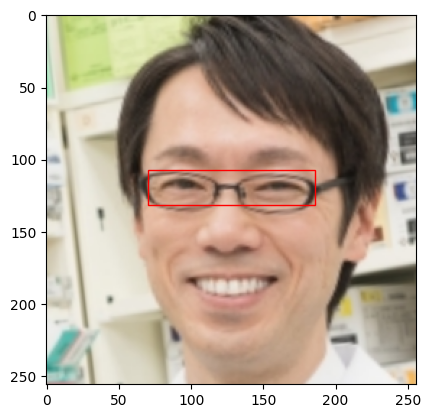

In [108]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img = PIL.Image.open(img_path)
# img2 = PIL.Image.open('imgs_test_align/yotaka_smile.png')

fig,ax = plt.subplots()
for i, rect in enumerate(rects_dict.keys()):
    if select_rects[i]:
        r = patches.Rectangle(
            xy=rects_dict[rect][:2],
            width=rects_dict[rect][2],
            height=rects_dict[rect][3],
            ec='r',
            fill=False)
        
        ax.add_patch(r)

ax.imshow(img)

### 画像の加工・保存

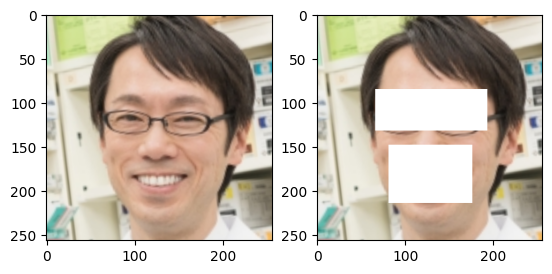

In [137]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(img_path)
dst_path = PROCESSED_IMAGES_DIR
dst_name = osp.splitext(img_name)[0]

# 他の画像でやる場合
# img2_path = 'imgs_test_align/yotaka_default.png'
# img2_name_no_ext = osp.splitext(osp.basename(filepath))[0]
# img = cv2.imread(img2_path)
# dst_path = igm2_path
# dst_name = img2_name_no_ext

img_eye_crop = img[eye2eyebrow_min[1]:eye2eyebrow_max[1], eye2eyebrow_min[0]:eye2eyebrow_max[0]]
img_mouth_crop = img[nose2mouth_min[1]:nose2mouth_max[1], nose2mouth_min[0]:nose2mouth_max[0]]
img_white_eye_crop = np.copy(img_eye_crop)
img_white_eye_crop[:] = 255
img_white_mouth_crop = np.copy(img_mouth_crop)
img_white_mouth_crop[:] = 255
img_eye_mask = np.copy(img)
img_mouth_mask = np.copy(img)
img_eye_mask[eye2eyebrow_min[1]:eye2eyebrow_max[1], eye2eyebrow_min[0]:eye2eyebrow_max[0]] = 255
img_mouth_mask[nose2mouth_min[1]:nose2mouth_max[1], nose2mouth_min[0]:nose2mouth_max[0]] = 255
img_mask = np.copy(img_eye_mask)
img_mask[nose2mouth_min[1]:nose2mouth_max[1], nose2mouth_min[0]:nose2mouth_max[0]] = 255

path_white_eye_crop = dst_path+'/'+dst_name+'_white_eye_crop.png'
path_white_mouth_crop = dst_path+'/'+dst_name+'_white_mouth_crop.png'
path_eye_crop = dst_path+'/'+dst_name+'_eye_crop.png'
path_mouth_crop = dst_path+'/'+dst_name+'_mouth_crop.png'
path_mask = dst_path+'/'+dst_name+'_mask.png'
path_eye_mask = dst_path+'/'+dst_name+'_eye_mask.png'
path_mouth_mask = dst_path+'/'+dst_name+'_mouth_mask.png'

# cv2.imwrite(path_white_eye_crop, img_white_eye_crop)
# cv2.imwrite(path_white_mouth_crop, img_white_mouth_crop)
# cv2.imwrite(path_eye_crop, img_eye_crop)
# cv2.imwrite(path_mouth_crop, img_mouth_crop)
# cv2.imwrite(path_mask, img_mask)
# cv2.imwrite(path_eye_mask, img_eye_mask)
# cv2.imwrite(path_mouth_mask, img_mouth_mask)


fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB))

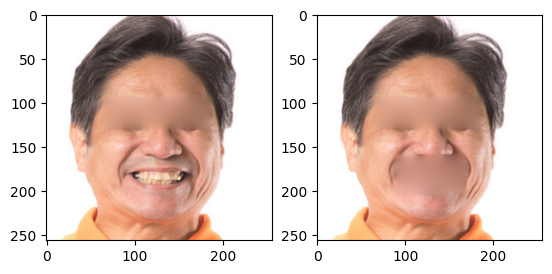

In [138]:
# center = eye2eyebrow_rect_center.astype(int)
center = nose2mouth_rect_center.astype(int)

crop_path = 'imgs_test_processing/white_mouth_crop.png'
base_path = 'imgs_test_processing/yotaka_smile_eye_seamless.png'
img = cv2.imread(base_path)
crop = cv2.imread(crop_path)
crop_mask = 255 * np.ones(crop.shape, crop.dtype)

output = cv2.seamlessClone(crop, img, crop_mask, center, cv2.NORMAL_CLONE)

# cv2.imwrite('imgs_test_processing/yotaka_smile_pose_seamless.png', output)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

# 直接指定する場合

In [1]:
from templates import *
import cv2
from PIL import Image

img_dir = "videos/video1_frames_align/"
dst_dir = "videos/video1_frames_prepare/"
material_dir = "videos/materials/"

eye_point = [72, 105, 188, 135]
mouth_point = [87, 170, 173, 200]

if not os.path.exists(dst_dir): os.makedirs(dst_dir)
if not os.path.exists(material_dir): os.makedirs(material_dir)

IMAGES = []
num_files = 0
for i,file in enumerate(os.listdir(img_dir)):
    img = Image.open(img_dir+file)
    IMAGES.append(img)
    num_files += 1

In [5]:
lineColor = (255,255,255)
img = np.array(IMAGES[0])
img = cv2.rectangle(img, pt1=eye_point[:2], pt2=eye_point[2:], color=lineColor)
img = cv2.rectangle(img, pt1=mouth_point[:2], pt2=mouth_point[2:], color=lineColor)
img = Image.fromarray(img)
img.save('videos/img_sample.png')

In [54]:
size=(eye_point[3]-eye_point[1],eye_point[2]-eye_point[0])
black_img=np.zeros(size,np.uint8)
eye_white_img=black_img+255
cv2.imwrite(material_dir+'eyewhite.png',eye_white_img);

In [55]:
size=(mouth_point[3]-mouth_point[1],mouth_point[2]-mouth_point[0])
black_img=np.zeros(size,np.uint8)
mouth_white_img=black_img+255
cv2.imwrite(material_dir+'mouthwhite.png',mouth_white_img);

In [56]:
no_EYE = []
src = cv2.imread(material_dir+"eyewhite.png")
src_mask = 255 * np.ones(src.shape, src.dtype)

vertical = int((eye_point[3]+eye_point[1])/2)
horizontal = int((eye_point[2]+eye_point[0])/2)
center = (horizontal,vertical)

for i in range(num_files):
  dst = np.array(IMAGES[i])
  output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)
  pil_img = Image.fromarray(output)
  no_EYE.append(pil_img)

In [57]:
no_IMAGES = []
src = cv2.imread(material_dir+"/mouthwhite.png")
src_mask = 255 * np.ones(src.shape, src.dtype)

vertical = int((mouth_point[3]+mouth_point[1])/2)
horizontal = int((mouth_point[2]+mouth_point[0])/2)
center = (horizontal,vertical)

for i in range(num_files):
  dst = np.array(no_EYE[i])
  output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)
  pil_img = Image.fromarray(output)
  no_IMAGES.append(pil_img)

In [58]:
eye_CROPS = []
mouth_CROPS = []

for i in range(num_files):
  eye_CROPS.append(IMAGES[i].crop(eye_point))
  mouth_CROPS.append(IMAGES[i].crop(mouth_point))

In [59]:
EYE_IMAGES = []
for i in range(num_files):

  src = np.array(eye_CROPS[i])
  src_mask = 255 * np.ones(src.shape, src.dtype)

  vertical = int((eye_point[3]+eye_point[1])/2)
  horizontal = int((eye_point[2]+eye_point[0])/2)
  center = (horizontal,vertical)
  dst = np.array(IMAGES[0])
  output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)
  pil_img = Image.fromarray(output)
  EYE_IMAGES.append(pil_img)

In [60]:
MOUTH_IMAGES = []
for i in range(num_files):

  src = np.array(mouth_CROPS[i])
  src_mask = 255 * np.ones(src.shape, src.dtype)

  vertical = int((mouth_point[3]+mouth_point[1])/2)
  horizontal = int((mouth_point[2]+mouth_point[0])/2)
  center = (horizontal,vertical)
  dst = np.array(IMAGES[0])
  output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)
  pil_img = Image.fromarray(output)
  MOUTH_IMAGES.append(pil_img)

In [67]:
dst_dir = "videos/materials/no_image_frames/"
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)
for i in range(num_files):
    dst_path = f'{dst_dir}{i+1:03}.png'
    no_IMAGES[i].save(dst_path)

In [70]:
dst_dir = "videos/materials/eye_image_frames/"
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)
for i in range(num_files):
    dst_path = f'{dst_dir}{i+1:03}.png'
    EYE_IMAGES[i].save(dst_path)

In [71]:
dst_dir = "videos/materials/mouth_image_frames/"
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)
for i in range(num_files):
    dst_path = f'{dst_dir}{i+1:03}.png'
    MOUTH_IMAGES[i].save(dst_path)